# Домашние задания за весь курс

Задание 1 - 30 баллов

Сформулировать постановку задачу, которую хочется решать в рамках курса.
Критерии оценки:

Сформулирована бизнес-постановка задачи (например, реализовать спам/не спам детектор) - 3 балла
Сформулирована постановка ML-задачи (бинарная классификация) - 2 балла
Представлен набор данных, достаточный для решения поставленной задачи - 3 балла
Выбрать и обосновать метрику для измерения качества.
В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения).

Критерии оценки:

Предложена метрика - 3 балла
Присутствует корректное обоснование - 5 баллов
Дополнительный материал о метриках: https://habr.com/ru/company/jetinfosystems/blog/420261/

Провести EDA на своих данных
В рамках данного пункта необходимо провести предварительный разведочный анализ своего набора данных.

Критерии оценки:

Рассмотрены базовые характеристики/статистики для набора данных - 3 балла
Реализованы наиболее релевантные визуализации - 5 баллов
По ходу работы присутствуют комментарии (вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, визуализации, расчитанные статистики, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп). - 6 балла
Предполагается, что студенты среди прочего продемонстрируют использование библиотек для визуализации, рассматриваемых в курсе (seaborn, plotly).


ОТВЕТЫ


Бизнес-постановка задачи: Предсказать, какие клиенты компании уйдут от комапнии (отвалятся, откажутся и пр. churn)

Постановка ML-задачи: бинарная классификация (по набору предикторов определяем бинарную принадлежность клиента: у уйдет или нет)

Набор данных, достаточный для решения поставленной задачи доступен тут

Метрика для измерения качества: Буду точно смотреть метрики Error rate	True Positive Rate	True Negative Rate	AUC	Precision.Основную метрику выбираю AUC

Обоснование метрики: Тут нет криично вадной разницы как например в кредитном скоринге, чтобы давать предпочтение только True Positive Rate	True Negative Rate. Надо построить модель которая будет максимеально стабильна и независма и комплексная метрикой AUC наглядно покажет насколько хорошо разделяются случаи в разных группах.


In [2]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [4]:
# Взглянем на наши данные
data = pd.read_excel('CustomerChurn.xls', index_col=[0])
data.head()

,Duration,Censor,Avg_Ret_Exp,Avg_Ret_Exp_SQ,Industry,Revenue,Employees,Total_Crossbuy,Total_Freq,Total_Freq_SQ
Customer,,,,,,,,,,
1,500,0,89.61,8029.9521,1,30.16,1240,6,16,256
2,730,1,49.89,2489.0121,0,39.80,166,6,10,100
3,730,1,40.70,1656.4900,0,54.93,1016,2,14,196
4,340,0,85.76,7354.7776,0,45.83,122,2,15,225
5,730,1,31.90,1017.6100,0,69.03,313,1,9,81


# 0. Предобработка данных

In [5]:
# Столбец Censor показывает остался (1) или ушел (0) клиент - мне удобнее работать с понятиями ушел (1),
# остался (0) - введем Churn по такому приннципу
data['Churn'] = (data['Censor']==0).astype(int)
data.head()

,Duration,Censor,Avg_Ret_Exp,Avg_Ret_Exp_SQ,Industry,Revenue,Employees,Total_Crossbuy,Total_Freq,Total_Freq_SQ,Churn
Customer,,,,,,,,,,,
1,500,0,89.61,8029.9521,1,30.16,1240,6,16,256,1
2,730,1,49.89,2489.0121,0,39.80,166,6,10,100,0
3,730,1,40.70,1656.4900,0,54.93,1016,2,14,196,0
4,340,0,85.76,7354.7776,0,45.83,122,2,15,225,1
5,730,1,31.90,1017.6100,0,69.03,313,1,9,81,0


In [6]:
# У нас много данных, которые будут бесполезны на этапах анализа и предсказания - сразу сформуируем таблицу, 
# по нашим пердинктоам и целевому значению
response='Churn'
predictors=['Avg_Ret_Exp', 'Revenue', 'Employees', 'Total_Crossbuy', 'Total_Freq', 'Industry']

data = data[[response]+predictors]
data.head()

,Churn,Avg_Ret_Exp,Revenue,Employees,Total_Crossbuy,Total_Freq,Industry
Customer,,,,,,,
1,1,89.61,30.16,1240,6,16,1
2,0,49.89,39.80,166,6,10,0
3,0,40.70,54.93,1016,2,14,0
4,1,85.76,45.83,122,2,15,0
5,0,31.90,69.03,313,1,9,0


In [7]:
# Насколько я помню, и всегда так делал, делить на тест и треин надо до EDA - можем обсудить на зачете,
# почему я считаю, что так более корректно

from sklearn.model_selection import train_test_split
# Будем делить в соотношении train (80%) и test (20%) 
index_train, index_test  = train_test_split(np.array(data.index), stratify=data[response], train_size=0.8, random_state=5)

# сформируем датасеты с которыми и будем работать
train = data.loc[index_train,].copy()
test =  data.loc[index_test,:].copy()
y_train = train[response]
y_test = test[response]
X_train = train[predictors]
X_test = test[predictors]

# 0. EDA

In [8]:
# Посмотрим сначала описательную статистику
train.describe().round(2)
#Заметим интересный факт, что 46% клиентов ушли(

,Churn,Avg_Ret_Exp,Revenue,Employees,Total_Crossbuy,Total_Freq,Industry
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,0.46,36.10,39.74,671.75,3.40,11.47,0.60
std,0.50,33.01,16.33,468.54,1.54,5.85,0.49
min,0.00,0.04,2.35,4.00,1.00,1.00,0.00
25%,0.00,10.08,27.86,286.25,2.00,6.00,0.00
50%,0.00,24.74,39.94,588.50,3.00,12.00,1.00
75%,1.00,57.24,51.69,1025.50,5.00,17.00,1.00
max,1.00,145.16,74.97,1950.00,6.00,21.00,1.00


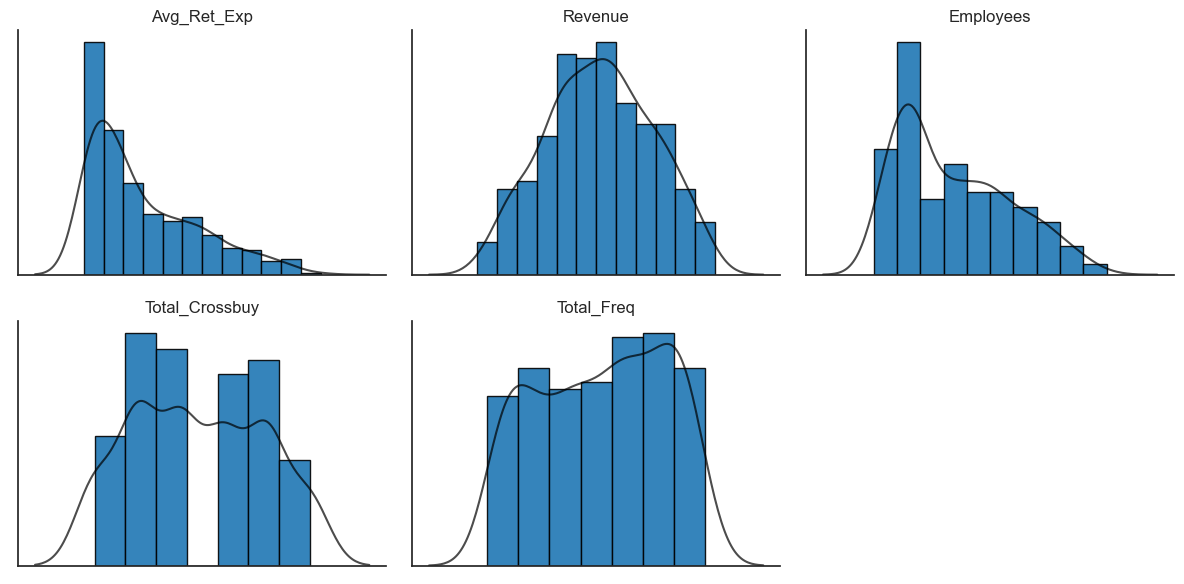

In [9]:
# Для дальнейшей работы с моделями нам важно, чтобы изучить распределение предикторов
from statlearning import plot_histograms

plot_histograms(train[predictors[:-1]]) # исключаем бинарную переменную
plt.show()

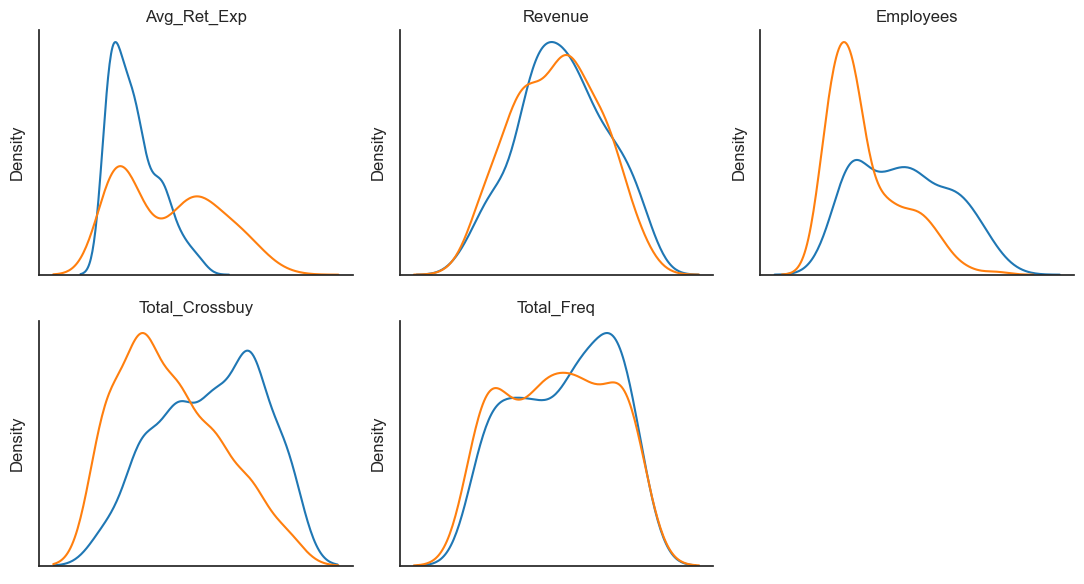

In [14]:
# давайте еще посомтрим плотность рапсределения по предикторам
from statlearning import plot_conditional_distributions

plot_conditional_distributions(train[predictors[:-1]], y_train, labels=['Retention', 'Churn'])
plt.show()

In [21]:
#   Вот еще занимательный момент - B2B клиенты сливаются чаще (50.6%) в сравнении с non-B2B клиентами (40.3%)
table=pd.crosstab(train[response], train['Industry'])
table = (table/table.sum()).round(3)
table

Industry,0,1
Churn,,
0,0.597,0.494
1,0.403,0.506


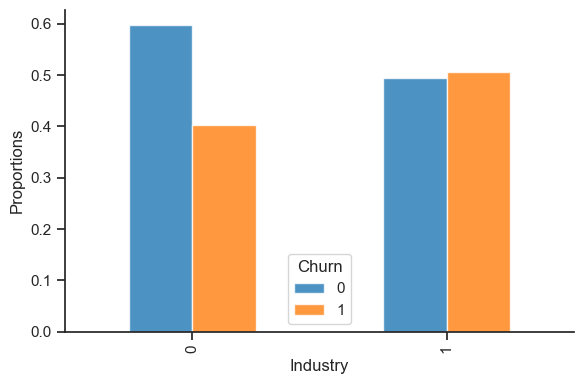

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
(table.T).plot(kind='bar', alpha=0.8, ax=ax)
ax.set_xlabel('Industry')
ax.set_ylabel('Proportions')
ax.legend_.set_title('Churn')
plt.tight_layout()
sns.despine()
plt.show()

Задание 2 - 30 баллов

Построить и оценить качество бейзлайна
В рамках данного пункта необходимо выбрать и обучить бейзлайн-модели, а также измерить их качество.

Критерии оценки:

Произведено разбиение датасета на тренировочную/тестовую выборки - 2 балла
Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3 балла
Бейзлайновая модель из простого семейства (линейные модели, деревья решений, knn...) обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 6 баллов
Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2 балла
Обеспечена воспроизводимость решения: зафиксированы random_state, ноутбук воспроизводится от начала до конца без ошибок - 3 балла
Соблюден code style на уровне pep8 и On writing clean Jupyter notebooks - 4 балла
Принимаемые решения обоснованы и прокомментированы в markdown ячейках (то есть, например, если для кодирования категориальных переменных выбран метод Label Encoding, то текстом написано, почему он, и тп) - 10 баллов


ОВТЕТ

разбил на трейн и тест ранее

Делаю ниже базовые методы

## 2.1 Logistic Classifier

In [33]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1e3)
logit.fit(X_train, y_train)

LogisticRegression(C=1000.0)

## 2.2 K-Nearest Neighbours Classifier

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn10 = KNeighborsRegressor(n_neighbors=10) # we should specify the number of neighbours
knn10.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

## 3.1 K-Nearest Neighbours Classifier + cross val

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def knn_cv(X_train, y_train):
    
    neighbours = np.arange(1, 51)
    best_score = 0
    
    for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors = k ,  metric='mahalanobis', metric_params={'V': X_train.cov()})
        score = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy'))
        if score >= best_score:
            best = knn
            best_score = score
    
    return best
        
knn = knn_cv(X_train, y_train) 
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='mahalanobis',
                     metric_params={'V':                 Avg_Ret_Exp     Revenue      Employees  Total_Crossbuy  \
Avg_Ret_Exp     1089.794985  -26.005308     -92.126184       -2.695855   
Revenue          -26.005308  266.668850      76.269418       -2.042006   
Employees        -92.126184   76.269418  219526.835833      -35.940113   
Total_Crossbuy    -2.695855   -2.042006     -35.940113        2.359875   
Total_Freq        -0.822244   -2.850140       6.477368       -0.885363   
Industry           0.874163   -0.646909     -20.707137        0.002018   

                Total_Freq   Industry  
Avg_Ret_Exp      -0.822244   0.874163  
Revenue          -2.850140  -0.646909  
Employees         6.477368 -20.707137  
Total_Crossbuy   -0.885363   0.002018  
Total_Freq       34.249724   0.046942  
Industry          0.046942   0.240094  },
                     n_neighbors=35)

## 3.2 Random Forest

In [53]:
# должны выбрать параметр, который управляет размером деревьев
# минимальным количеством наблюдений в конечном узле 
# количеством предикторов, которые выбираются в качестве возможных переменных разделения в каждом узле дерева.
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier(criterion='entropy',  n_estimators=1000, random_state=1)

tuning_parameters = {
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_features': np.arange(1, len(predictors)+1),
}

rf_search = RandomizedSearchCV(model, tuning_parameters, cv=5, n_iter=16, return_train_score=False, n_jobs=4)
rf_search.fit(X_train, y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 1, 'max_features': 5} 



In [54]:
# теперь можем увеличить число деверьев
rf.n_estimators = 10000
rf.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=10000,
                       random_state=1)

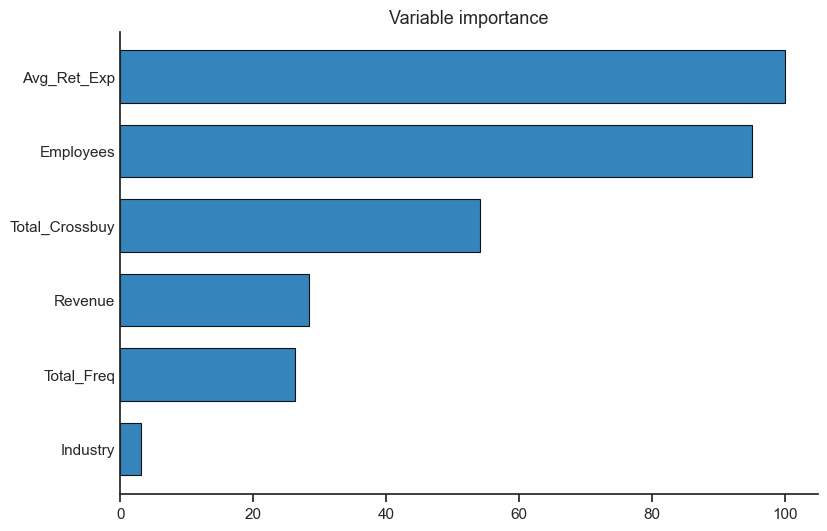

In [55]:
# взглянем на значимость предикторов
from statlearning import plot_feature_importance

plot_feature_importance(rf, predictors)
plt.show()

## 2-3 Сравниваем модели

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score

columns=['Error rate', 'True Positive Rate', 'True Negative Rate', 'AUC', 'Precision']
rows=['Logistic Regression', 'KNN', 'Random Forest']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[logit, knn, rf]

y_prob = np.zeros((len(test), len(rows)))

for i, method in enumerate(methods):
    
    y_pred = method.predict(X_test)
    y_prob[:, i] = method.predict_proba(X_test)[:,1]

    confusion  = confusion_matrix(y_test, y_pred) 

    results.iloc[i,0]=  1 - accuracy_score(y_test, y_pred)
    results.iloc[i,1]=  confusion[1,1]/np.sum(confusion[1,:])
    results.iloc[i,2]=  confusion[0,0]/np.sum(confusion[0,:])
    results.iloc[i,3]=  roc_auc_score(y_test, y_prob[:,i])
    results.iloc[i,4]=  precision_score(y_test, y_pred)

results.round(3)

,Error rate,True Positive Rate,True Negative Rate,AUC,Precision
Logistic Regression,0.24,0.804,0.722,0.839,0.712
KNN,0.29,0.652,0.759,0.822,0.698
Random Forest,0.21,0.848,0.741,0.882,0.736


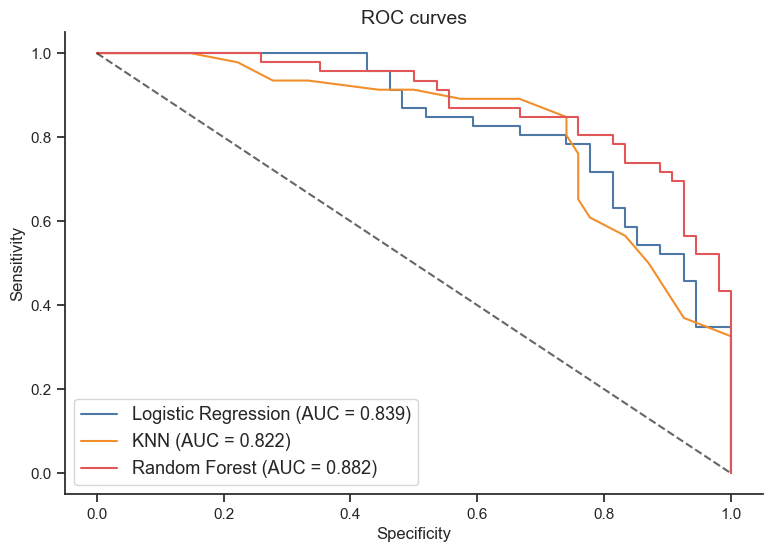

In [57]:
from statlearning import plot_roc_curves

with sns.color_palette(crayon):
    fig, ax = plot_roc_curves(y_test, y_prob, labels=pd.Series(rows))
    plt.show()